1、插值

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from scipy.interpolate import interp1d
#导入一维插值函数 interp1d：interp1d(x, y)
#返回值可以像函数一样接受输入，并返回插值的结果
#默认情况下，输入值要在插值允许的范围内，否则插值会报错

In [ ]:
interp1d 默认的插值方法是线性
可以通过 kind 参数来调节使用的插值方法，来得到不同的结果：

nearest 最近邻插值
zero 0阶插值
linear 线性插值
quadratic 二次插值
cubic 三次插值
4,5,6,7 更高阶插值

In [ ]:
径向基函数
可以利用径向基函数进行插值
from scipy.interpolate.rbf import Rbf

#使用 multiquadric 核的
cp_rbf = Rbf(data['TK'], data['Cp'], function = "multiquadric")

2、拟合

In [34]:
#导入基础包
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

#导入多项式拟合工具
from numpy import polyfit, poly1d

#多项式拟合
coeff = polyfit(x, noise_y, 1)
#可以用 poly1d 生成一个以传入的 coeff 为参数的多项式函数
f = poly1d(coeff)

In [39]:
#最小二乘法
#导入相关的模块
from scipy.linalg import lstsq
from scipy.stats import linregress

x = np.linspace(0,5,100)
y = 0.5 * x + np.random.randn(x.shape[-1]) * 0.35
#构造X
X = np.hstack((x[:,np.newaxis], np.ones((x.shape[-1],1))))
lstsq(X, y)

(array([ 0.53380657, -0.12464739]),
 11.349587659494661,
 2,
 array([ 30.23732043,   4.82146667]))

In [40]:
#对于上面的问题，还可以使用线性回归进行求解 Scipy.stats.linregress 线性回归
linregress(x, y)

LinregressResult(slope=0.5338065748593378, intercept=-0.12464738960480148, rvalue=0.91770195690722545, pvalue=4.4881534478724263e-41, stderr=0.023342885136621371)

In [44]:
#更高级别的拟合
#注意这种拟合是传入了函数的，只是参数未知
from scipy.optimize import leastsq

#先定义这个非线性函数
def function(x, a , b, f, phi):
    """a function of x with four parameters"""
    result = a * np.exp(-b * np.sin(f * x + phi))
    return  result

x = np.linspace(0, 2 * np.pi, 50)
actual_parameters = [3, 2, 1.25, np.pi / 4]
y = function(x, *actual_parameters)

#加入噪声
from scipy.stats import norm
y_noisy = y + 0.8 * norm.rvs(size=len(x))

########第一种方法
#定义误差函数，将要优化的参数放在前面
def f_err(p, y, x):
    return y - function(x, *p)

print(leastsq(f_err, [1, 1, 1, 1], args=(y_noisy, x)))
#第二个参数为初始值

########第二种方法
from scipy.optimize import curve_fit

#不需要定义误差函数，直接传入 function 作为参数
curve_fit(function, x, y_noisy)
#第二个返回值为各个参数的协方差矩阵

(array([ 3.08997882,  1.96707101,  1.26614267,  0.74186276]), 1)


(array([ 3.0899788 ,  1.96707102,  1.26614267,  0.74186277]),
 array([[ 0.13419887, -0.04298371,  0.0154261 , -0.0483802 ],
        [-0.04298371,  0.01400406, -0.00480545,  0.01507115],
        [ 0.0154261 , -0.00480545,  0.00220936, -0.00692905],
        [-0.0483802 ,  0.01507115, -0.00692905,  0.0219102 ]]))

3、概率统计方法

In [17]:
#导入 Scipy 的统计模块：
import scipy.stats as st

In [18]:
#连续分布：

#导入正态分布：
from scipy.stats import norm

#它包含四类常用的函数：
#norm.cdf 返回对应的累计分布函数值
#norm.pdf 返回对应的概率密度函数值
#norm.rvs 产生指定参数的随机变量
#norm.fit 返回给定数据下，各参数的最大似然估计（MLE）值

其他分布类似
from scipy.stats import lognorm, t, dweibull

In [ ]:
#离散分布
from scipy.stats import binom, poisson, randint

In [31]:
#自定义离散分布

#导入要用的函数
from scipy.stats import rv_discrete
#一个不均匀的骰子对应的离散值及其概率
xk = [1, 2, 3, 4, 5, 6]
pk = [.3, .35, .25, .05, .025, .025]
#定义离散分布
loaded = rv_discrete(values=(xk, pk))
#此时， loaded 可以当作一个离散分布的模块来使用
#产生两个服从该分布的随机变量：
loaded.rvs(size=2)

array([4, 1])

In [19]:
#导入积分函数
from scipy.integrate import trapz

x1 = np.linspace(-2,2,108)
p = trapz(st.norm.pdf(x1), x1) 
print('{:.2%} of the values lie between -2 and 2'.format(p))

95.45% of the values lie between -2 and 2


In [ ]:
#两种一样
p = plot(x, norm.pdf(x, loc=0, scale=1))
p = plot(x, norm(loc=0, scale=1).pdf(x))

In [ ]:
#假设检验
from scipy.stats import norm
from scipy.stats import ttest_ind, ttest_rel, ttest_1samp
from scipy.stats import t

#独立双样本 t 检验
ttest_ind(n1_samples, n2_samples)
#配对样本 t 检验
ttest_rel(n0, n1)
？？？传入的参数到底是什么

4、最值

In [ ]:
from scipy.optimize import minimize

result = minimize(neg_dist, 40, args=(1,))
#minimize 接受三个参数：第一个是要优化的函数，第二个是初始猜测值，第三个则是优化函数的附加参数
#默认 minimize 将优化函数的第一个参数作为优化变量，所以第三个参数输入的附加参数从优化函数的第二个参数开始。

In [ ]:
#rosenbroke函数
from scipy.optimize import rosen

x, y = meshgrid(np.linspace(-2,2,25), np.linspace(-0.5,3.5,25))
z = rosen([x,y])

In [ ]:
minimize 函数默认根据问题是否有界或者有约束，使用 'BFGS', 'L-BFGS-B', 'SLSQP' 中的一种

minimize(rosen, x0, method="nelder-mead", callback = xi.append)
#利用 callback 参数查看迭代的历史

5、积分

sqrt(x**2 + y**2)


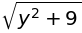

In [12]:
#符号运算
from sympy import init_printing
init_printing()
from sympy import symbols,integrate
import sympy

#符号运算
x, y = symbols('x y')
z=sympy.sqrt(x ** 2 + y ** 2)
print(z)
#赋值
z.subs(x, 3)

In [13]:
#导入现成的符号
from sympy.abc import theta
y = sympy.sin(theta) ** 2
y

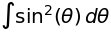

In [18]:
#产生不定积分对象
Y_indef = sympy.Integral(y)
Y_indef

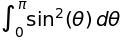

In [17]:
#定积分
Y_def = sympy.Integral(y, (theta, 0, sympy.pi))
Y_def

In [21]:
#将其向量化
Y_raw = lambda x: integrate(y, (theta, 0, x))
Y = np.vectorize(Y_raw)

In [9]:
#不定积分
Y = integrate(y)
print(Y)
##################定积分
print(integrate(y, (theta, 0, sympy.pi)))
#如果想查看数值
print(integrate(y, (theta, 0, sympy.pi)).evalf())
import numpy as np
integrate(y, (theta, 0, np.pi))

theta/2 - sin(theta)*cos(theta)/2
pi/2
1.57079632679490


1.57079632679490

In [23]:
###########quad函数积分

#导入贝塞尔函数
from scipy.special import jv
def f(x):
    return jv(2.5, x)

from scipy.integrate import quad
interval = [0, 6.5]
value, max_err = quad(f, *interval)
value

In [ ]:
#积分到无穷
from numpy import inf
interval = [0., inf]

In [ ]:
#双重积分
#一种方式是调用两次 quad 函数，不过这里 quad 的返回值不能向量化，所以使用了修饰符 vectorize 将其向量化
def h(x, t, n):
    """core function, takes x, t, n"""
    return np.exp(-x * t) / (t ** n)

from numpy import vectorize
@vectorize
def int_h_dx(t, n):
    """Time integrand of h(x)."""
    return quad(h, 0, np.inf, args=(t, n))[0]

@vectorize
def I_n(n):
    return quad(int_h_dx, 1, np.inf, args=(n))

#直接调用 dblquad 函数，并将积分参数传入，传入方式有多种，后传入的先进行积分：
from scipy.integrate import dblquad
@vectorize
def I(n):
    """Same as I_n, but using the built-in dblquad"""
    x_lower = 0
    x_upper = np.inf
    return dblquad(h,
                   lambda t_lower: 1, lambda t_upper: np.inf,
                   x_lower, x_upper, args=(n,))

In [ ]:
##############trapz 方法 和 simps 方法
from scipy.integrate import trapz, simps
x_s = np.linspace(0, np.pi, 5)
y_s = np.sin(x_s)
result_s = trapz(y_s, x_s)
result_s_s = simps(y_s, x_s)

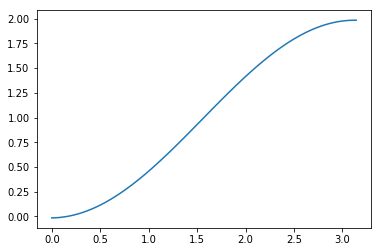

In [26]:
##############使用 ufunc 进行积分
#??????很奇怪
x = np.linspace(0, np.pi, 100)
y = np.sin(x)
result_np = np.add.accumulate(y) * (x[1] - x[0]) - (x[1] - x[0]) / 2
%matplotlib inline
import matplotlib.pyplot as plt
p = plt.plot(x, result_np)

6、解微分方程

In [ ]:
#一次方程积分求解
from scipy.integrate import odeint
t = np.linspace(0, 2*pi, 100)
result = odeint(dy_dt, 0, t)

7、线性代数

In [2]:
#numpy 和 scipy 中，负责进行线性代数部分计算的模块叫做 linalg
import numpy as np
import numpy.linalg
import scipy as sp
import scipy.linalg
import matplotlib.pyplot as plt
%matplotlib inline
#在使用时，我们一般使用 scipy.linalg 而不是 numpy.linalg

In [3]:
#矩阵的表示方法主要有两种：numpy.matrix 和 2D numpy.ndarray
#一般使用 2 维 numpy.ndarray 对象替代
A = np.array([[1,2], [3,4]])
A

array([[1, 2],
       [3, 4]])

In [ ]:
#linalg.inv 可以求一个可逆矩阵的逆
#linalg.solve 求解线性方程组
#linalg.det 计算行列式
#linalg.norm 可以计算向量或者矩阵的模
#linalg.lstsq 求解最小二乘解（要先构造矩阵A）
#linalg.eig(A)返回矩阵的特征值与特征向量
#linalg.eigvals(A)返回矩阵的特征值

8、稀疏矩阵

In [5]:
#稀疏矩阵主要使用 位置 + 值 的方法来存储矩阵的非零元素
from scipy.sparse import *
import numpy as np

#创建一个空的稀疏矩阵
A=coo_matrix((2,3))
A

<2x3 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in COOrdinate format>

In [11]:
#传入一个 (data, (row, col)) 的元组来构建稀疏矩阵
I = np.array([0,3,1,0])
J = np.array([0,3,1,2])
V = np.array([4,5,7,9])
M= coo_matrix((V,(I,J)),shape=(4,4))
print(M)

  (0, 0)	4
  (3, 3)	5
  (1, 1)	7
  (0, 2)	9


In [9]:
#不同格式的稀疏矩阵可以相互转化
print(type(A))
B = A.tocsr()
type(B)

<class 'scipy.sparse.coo.coo_matrix'>


scipy.sparse.csr.csr_matrix

In [10]:
#可以转化为普通矩阵
C = A.todense()
C

matrix([[ 0.,  0.,  0.],
        [ 0.,  0.,  0.]])

In [14]:
#COO 格式的稀疏矩阵在构建的时候只是简单的将坐标和值加到后面，对于重复的坐标不进行处理
I = np.array([0,0,1,3,1,0,0])
J = np.array([0,2,1,3,1,0,0])
V = np.array([1,1,1,1,1,1,1])
B = coo_matrix((V,(I,J)),shape=(4,4))
print(B)

  (0, 0)	1
  (0, 2)	1
  (1, 1)	1
  (3, 3)	1
  (1, 1)	1
  (0, 0)	1
  (0, 0)	1


In [16]:
#转换成 CSR 格式会自动将相同坐标的值合并
C = B.tocsr()
print(B)

  (0, 0)	3
  (1, 1)	2
  (0, 2)	1
  (3, 3)	1


In [ ]:
#稀疏矩阵求解方程组

#转化为 CSR 之后，用 spsolve 求解
x_ = solve(A.toarray(), b)
#或者转化成正常数组之后求解
x_ = solve(A.toarray(), b)

In [ ]:
#sparse.find 函数
#返回一个三元组，表示稀疏矩阵中非零元素的 (row, col, value)：
from scipy import sparse
row, col, val = sparse.find(C)

In [ ]:
#稀疏矩阵的线性代数
import scipy.sparse.linalg

scipy.sparse.linalg.inv
稀疏矩阵求逆
scipy.sparse.linalg.expm
求稀疏矩阵的指数函数
矩阵范数
scipy.sparse.linalg.norm
稀疏矩阵求范数